<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 4:</span> Cluster Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 4: Cluster Analysis</span>!

At last, it's time to build our clustering models!


For clustering problems, the chosen input features are usually more important than which algorithm you use.
* In this module, we'll apply the K-Means algorithm to 3 different feature sets.
* There are no clear, widely-accepted performance metrics for clusters because there're no "ground truth" labels.
* Even so, we can compare the different clusters created from the 3 different feature sets.

<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [K-Means](#k-means)
2. [Base features](#base)
3. [Threshold features](#threshold)
4. [PCA features](#pca)
5. [Model comparison](#comparison)


<br><hr>

### First, let's import libraries and load the datasets.

First, import libraries that you'll need.

In [1]:

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans


**Next, let's import 3 CSV files we've saved throughout this project.**
* Let's import <code style="color:crimson">'analytical_base_table.csv'</code> (created in Module 1) as <code style="color:steelblue">base_df</code>. 
* Let's import <code style="color:crimson">'threshold_item_data.csv'</code> (created in Module 2) as <code style="color:steelblue">threshold_item_data</code>. 
* Let's import <code style="color:crimson">'pca_item_data.csv'</code> (created in Module 3) as <code style="color:steelblue">pca_item_data</code>. 
* Set <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [7]:
# Import analytical base table
base_df = pd.read_csv('project_files/analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('project_files/threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('project_files/pca_item_data.csv', index_col=0)


**Print the shape of each one to make sure we're on the same page.**

In [8]:
# Print shape of each dataframe
print('base_df shape:',base_df.shape)
print('threshold_item_data shape:',threshold_item_data.shape)
print('pca_item_data shape:',pca_item_data.shape)


base_df shape: (414, 8)
threshold_item_data shape: (414, 20)
pca_item_data shape: (414, 125)


<span id="k-means"></span>
# 1. K-Means

For clustering, which algorithm you choose is typically less important than the **input features** that you feed into it. 

<br>
**We already have a <code style="color:steelblue">base_df</code>.** 

**Create a <code style="color:steelblue">threshold_df</code> by joining it with <code style="color:steelblue">threshold_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [9]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Create a <code style="color:steelblue">pca_df</code> by joining <code style="color:steelblue">base_df</code> with <code style="color:steelblue">pca_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [11]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828917,-0.495520,3.093817,-0.633708,-11.534084,2.161867,7.116915,5.336035,4.424213,4.636869,2.316706,12.310705,1.986308,-11.431522,5.617799,-2.177107,7.666105,-12.135046,-16.048437,-5.949357,7.814667,40.517965,-35.573959,-17.558449,6.870565,20.886988,2.297317,-26.157811,-32.582580,7.874842,12.357173,6.824944,-32.957841,-4.408964,-17.236616,-11.270894,-14.488724,-2.775591,4.727806,-6.982853,-1.468485,...,2.417069,2.397380,-0.941841,-1.771471,-1.891056,1.426720,0.514714,-1.329238,-2.070995,-3.567318,0.420106,-1.873773,0.608644,0.225148,1.247913,-2.008220,0.508903,0.004995,-0.315268,0.493796,-0.405389,-0.400921,0.165516,0.615358,-0.013867,1.057333,-0.975530,-0.679759,-0.081903,1.241244,-0.159342,-0.270531,-0.371727,1.309280,-0.349017,0.671297,0.586811,0.958931,-0.049154,0.002232,0.302355,-0.472515,0.476504,-0.224732,-0.200536,-0.027148,-0.042364,-0.423895,0.035813,-0.008695
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219840,1.226202,-1.881985,-0.174132,0.818151,1.160652,-0.872004,-0.846536,0.460069,0.854503,-0.401620,0.982186,-1.103746,0.769771,-0.093136,-0.312482,-0.450115,1.207786,0.382336,-0.468787,0.185405,0.054205,0.500452,0.372384,1.228396,-0.773669,-0.269951,0.851330,-0.370734,-0.572810,1.014038,-0.580549,0.950556,-0.731429,0.355093,-0.383835,-0.295616,0.392291,0.160758,0.350210,-0.470500,0.710040,...,-1.074739,-0.953274,-0.475367,-0.388051,0.009141,0.103553,-0.710915,-0.448076,0.878387,0.235083,0.352965,-0.178614,-1.843765,-0.212106,-0.570797,-0.926800,0.836838,-0.680162,-0.893861,0.599494,-0.595225,-0.383549,0.835390,1.761761,0.125760,-0.132125,0.866873,-0.600032,2.214361,0.698500,0.247440,-1.166430,-0.557828,-1.110381,0.415938,-0.024967,-0.467234,-0.579026,1.558150,-2.113024,-1.367416,0.239665,0.215433,-0.373279,1.575009,0.638675,-0.596894,0.889098,0.624630,1.614139
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260859,2.387742,-0.073068,-1.119069,-0.034365,-3.715200,-0.343812,-0.148754,-0.790413,-0.379014,1.570175,0.182479,0.224448,-0.050740,3.177726,-0.514846,-1.840132,0.380887,0.314556,-0.008057,-0.419399,0.457422,-0.786373,1.753847,-1.476548,0.750818,-0.910373,0.768979,0.509329,-1.345238,0.288692,0.661854,0.089524,-0.210543,-0.679288,-1.523481,0.795988,-1.415155,-0.076540,-0.906351,0.098620,-0.100551,...,1.984720,-0.816916,1.820240,0.531328,1.094893,-0.326960,-0.975781,0.872205,1.101062,-0.786393,1.597392,0.316352,-2.421799,-2.113772,0.395067,-2.545474,-2.547157,0.516273,-0.633277,-2.719289,0.893431,-1.082905,1.100015,-0.528303,0.765095,-2.168206,1.002676,-0.083857,-1.656051,1.706962,-0.883322,-2.690096,1.117467,-2.203132,-0.915379,1.433624,0.870927,-4.989873,-1.697029,-0.178207,1.947340,0.927154,1.856710,4.025191,-2.420657,-1.884018,-2.681383,1.833679,0.478056,-0.407825
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714873,-1.580904,-0.469924,-0.116364,0.647980,0.112872,-1.336355,1.547054,-1.190440,-0.213164,1.057978,-0.475222,0.856756,-1.305362,0.242266,0.268725,1.952552,-0.227657,0.571338,-0.186077,0.905119,1.363727,0.179568,-0.259090,-0.168340,-0.684958,1.087527,-0.153032,-0.398988,0.237813,0.633195,-1.446609,-0.183328,-0.317974,-0.300933,-1.361827,0.003148,0.571150,-0.257187,0.

**Before moving on, add this import to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.cluster import KMeans
</pre>

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="base"></span>
# 2. Base DF

The first set of features we'll consider is **"Base DF"**. 
* This only includes the purchase pattern features from our analytical base table.

<br>
**First, display the first 5 observations from <code style="color:steelblue">base_df</code> just as reminder.**

In [12]:
# First 5 observations of base_df
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


**Let's initialize a model pipeline for K-Means.**
* Note that we can control the number of clusters using <code style="color:steelblue">n_clusters=3</code>. This is the hyperparameter $k$.
* We also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [13]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Once we have the pipeline, fitting the model is just 1 line of code.**

In [14]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Let's save the clusters to our dataframe.**

In [15]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


**To visualize these clusters, we can plot a scatterplot and color the points by cluster.**
* Since it's impossible to visualize all of the features, we'll just pick 2.
* We use the <code style="color:steelblue">hue=</code> argument to color by cluster.

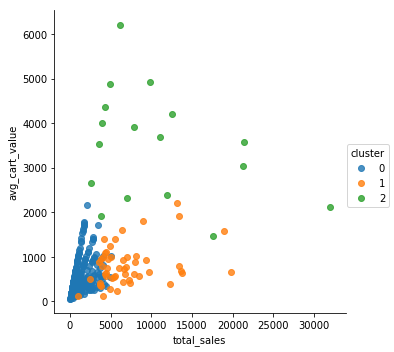

In [35]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)
#plt.scatter(base_df['total_sales'], base_df['avg_cart_value'], c=base_df['cluster'])


<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="threshold"></span>
# 3. Threshold DF

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.

We'll repeat the same steps as above.

<br>
**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [36]:
# K-Means model pipeline
K_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">threshold_df</code>.**

In [37]:
# Fit K-Means pipeline
K_means.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">threshold_df</code>.**

In [38]:
# Save clusters to threshold_df
threshold_df['cluster'] = K_means.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2


If you scroll to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

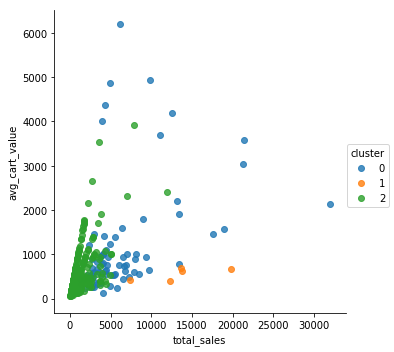

In [39]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="pca"></span>
# 4. PCA DF

The last set of features we'll consider is **"PCA DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the first 125 principal component features from the item data.

We'll repeat the same steps as above.

<br>

**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [40]:
# K-Means model pipeline
K_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">pca_df</code>.**

In [41]:
# Fit K-Means pipeline
K_means.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">pca_df</code>.**

In [42]:
# Save clusters to pca_df
pca_df['cluster'] = K_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828917,-0.495520,3.093817,-0.633708,-11.534084,2.161867,7.116915,5.336035,4.424213,4.636869,2.316706,12.310705,1.986308,-11.431522,5.617799,-2.177107,7.666105,-12.135046,-16.048437,-5.949357,7.814667,40.517965,-35.573959,-17.558449,6.870565,20.886988,2.297317,-26.157811,-32.582580,7.874842,12.357173,6.824944,-32.957841,-4.408964,-17.236616,-11.270894,-14.488724,-2.775591,4.727806,-6.982853,-1.468485,...,2.397380,-0.941841,-1.771471,-1.891056,1.426720,0.514714,-1.329238,-2.070995,-3.567318,0.420106,-1.873773,0.608644,0.225148,1.247913,-2.008220,0.508903,0.004995,-0.315268,0.493796,-0.405389,-0.400921,0.165516,0.615358,-0.013867,1.057333,-0.975530,-0.679759,-0.081903,1.241244,-0.159342,-0.270531,-0.371727,1.309280,-0.349017,0.671297,0.586811,0.958931,-0.049154,0.002232,0.302355,-0.472515,0.476504,-0.224732,-0.200536,-0.027148,-0.042364,-0.423895,0.035813,-0.008695,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219840,1.226202,-1.881985,-0.174132,0.818151,1.160652,-0.872004,-0.846536,0.460069,0.854503,-0.401620,0.982186,-1.103746,0.769771,-0.093136,-0.312482,-0.450115,1.207786,0.382336,-0.468787,0.185405,0.054205,0.500452,0.372384,1.228396,-0.773669,-0.269951,0.851330,-0.370734,-0.572810,1.014038,-0.580549,0.950556,-0.731429,0.355093,-0.383835,-0.295616,0.392291,0.160758,0.350210,-0.470500,0.710040,...,-0.953274,-0.475367,-0.388051,0.009141,0.103553,-0.710915,-0.448076,0.878387,0.235083,0.352965,-0.178614,-1.843765,-0.212106,-0.570797,-0.926800,0.836838,-0.680162,-0.893861,0.599494,-0.595225,-0.383549,0.835390,1.761761,0.125760,-0.132125,0.866873,-0.600032,2.214361,0.698500,0.247440,-1.166430,-0.557828,-1.110381,0.415938,-0.024967,-0.467234,-0.579026,1.558150,-2.113024,-1.367416,0.239665,0.215433,-0.373279,1.575009,0.638675,-0.596894,0.889098,0.624630,1.614139,1
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260859,2.387742,-0.073068,-1.119069,-0.034365,-3.715200,-0.343812,-0.148754,-0.790413,-0.379014,1.570175,0.182479,0.224448,-0.050740,3.177726,-0.514846,-1.840132,0.380887,0.314556,-0.008057,-0.419399,0.457422,-0.786373,1.753847,-1.476548,0.750818,-0.910373,0.768979,0.509329,-1.345238,0.288692,0.661854,0.089524,-0.210543,-0.679288,-1.523481,0.795988,-1.415155,-0.076540,-0.906351,0.098620,-0.100551,...,-0.816916,1.820240,0.531328,1.094893,-0.326960,-0.975781,0.872205,1.101062,-0.786393,1.597392,0.316352,-2.421799,-2.113772,0.395067,-2.545474,-2.547157,0.516273,-0.633277,-2.719289,0.893431,-1.082905,1.100015,-0.528303,0.765095,-2.168206,1.002676,-0.083857,-1.656051,1.706962,-0.883322,-2.690096,1.117467,-2.203132,-0.915379,1.433624,0.870927,-4.989873,-1.697029,-0.178207,1.947340,0.927154,1.856710,4.025191,-2.420657,-1.884018,-2.681383,1.833679,0.478056,-0.407825,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714873,-1.580904,-0.469924,-0.116364,0.647980,0.112872,-1.336355,1.547054,-1.190440,-0.213164,1.057978,-0.475222,0.856756,-1.305362,0.242266,0.268725,1.952552,-0.227657,0.571338,-0.186077,0.905119,1.363727,0.179568,-0.259090,-0.168340,-0.684958,1.087527,-0.153032,-0.398988,0.237813,0.633195,-1.446609,-0.183328,-0.317974,-0.300933,-1.361827,0.003148,0.571150,-0.257187,0.595285,-0.219992,..

Again, if you scroll ALLLLLLL the way to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

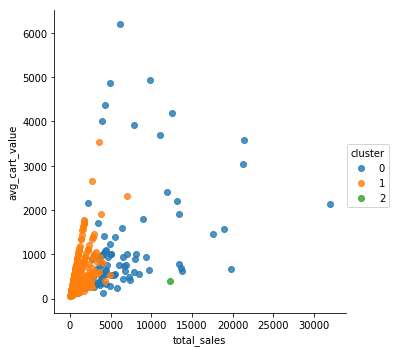

In [43]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="comparison"></span>
# 5. Model comparison

Each of those 3 dataframes have the same indices:

In [46]:
# Check all indices are identical
print(all(base_df.index == threshold_df.index))
print(all(base_df.index == pca_df.index))

True
True


**Let's import the adjusted Rand index from Scikit-Learn.**

In [47]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score 

**We can see the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code> like so:**

In [48]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.60213549517823428

Furthermore, the adjusted Rand index is **symmetric**, which means you can pass in the clusters in any order.

In [50]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster, base_df.cluster)

0.60213549517823428

**Finally, display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.**
* Is it higher or lower than the one between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code>?
* Which clusters are more like the ones created from the the base dataframe?

In [51]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.71095553097377562

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making it through Project 4's Cluster Analysis!

As a reminder, here are a few things you did in this module:
* You brought together all of the customer-level features you've created in this project.
* You learned the inuitition behind the K-Means algorithm.
* You applied the K-Means algorithm to 3 different feature sets.
* And you compared the consensus (or lack thereof) of the clusters created.

This marks the end of Project 4!

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>